### Batch Runner of ModularCirc

This file samples the input parameters of the Korakianitis model then batch solves this using ModularCirc. The raw output, pressure traces, cardiac output are all saved. Additionally a PCA is run on the pressure traces and are also saved.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from ModularCirc import BatchRunner

In [3]:
br = BatchRunner('Sobol', 0) 
#'LHS' : LatinHypercube,
#'Sobol' : Sobol,
#'Halton': Halton,

In [4]:
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCirc/Emulation'

In [5]:
# Parameters_01 = Korakianitis Model
br.setup_sampler('parameters_pat.json')

In [6]:
# Set number of samples 
n_sample = 100
br.sample(n_sample)

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [7]:
br._samples

,svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,ra.E_act,ra.v_ref,ra.tpwb,ra.k_pas,ra.v,delay,tr,td0,tpww,v_tot
0,27.687002,0.443723,3.278327,1.623082,0.478369,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
1,10.935100,0.243385,4.286711,2.717826,0.805784,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
2,18.671167,0.356841,2.549143,0.822205,0.950488,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
3,24.992088,0.155291,5.101243,3.333386,0.614289,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
4,22.700741,0.326891,3.862239,2.779415,0.551895,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27.406567,0.196824,3.333852,1.704984,0.646159,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
96,26.960391,0.395660,2.043640,0.645535,0.810764,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
97,10.379113,0.271468,5.547834,3.156299,0.473453,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
98,17.956148,0.327547,3.782205,1.440794,0.618088,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550


In [8]:
sample_name = 'bestem'
posterior_samples = pd.read_csv(f"../Results/posterior_samples_{sample_name}.csv")
posterior_samples

for i, col in enumerate(br._samples.columns[:5]):
    br._samples.loc[:, col] = posterior_samples.loc[:,col]

br.samples

,svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,ra.E_act,ra.v_ref,ra.tpwb,ra.k_pas,ra.v,delay,tr,td0,tpww,v_tot
0,20.489813,0.120280,4.252702,2.918484,0.614583,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
1,20.202433,0.124029,4.755494,2.862295,0.614389,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
2,21.445760,0.116090,4.329751,3.032221,0.614143,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
3,19.736450,0.121881,4.564345,2.957585,0.614215,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
4,21.518113,0.122322,4.615995,2.809836,0.613439,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19.661199,0.112241,4.518416,2.900147,0.614085,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
96,22.252270,0.119129,4.308378,2.863725,0.615103,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
97,21.802802,0.116435,4.142494,2.841520,0.614036,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
98,25.093973,0.132775,4.347543,2.878064,0.614351,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550


In [9]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [10]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [11]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [12]:
br.samples

,svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,ra.v,v_tot,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td
0,20.489813,0.120280,4.252702,2.918484,0.614583,0.003,0.08,0.000062,0,1.07,...,20,550,0.092187,0.092187,0.184375,0.184375,0.055312,0.055312,0.276562,0.276562
1,20.202433,0.124029,4.755494,2.862295,0.614389,0.003,0.08,0.000062,0,1.07,...,20,550,0.092158,0.092158,0.184317,0.184317,0.055295,0.055295,0.276475,0.276475
2,21.445760,0.116090,4.329751,3.032221,0.614143,0.003,0.08,0.000062,0,1.07,...,20,550,0.092121,0.092121,0.184243,0.184243,0.055273,0.055273,0.276364,0.276364
3,19.736450,0.121881,4.564345,2.957585,0.614215,0.003,0.08,0.000062,0,1.07,...,20,550,0.092132,0.092132,0.184264,0.184264,0.055279,0.055279,0.276397,0.276397
4,21.518113,0.122322,4.615995,2.809836,0.613439,0.003,0.08,0.000062,0,1.07,...,20,550,0.092016,0.092016,0.184032,0.184032,0.055209,0.055209,0.276047,0.276047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19.661199,0.112241,4.518416,2.900147,0.614085,0.003,0.08,0.000062,0,1.07,...,20,550,0.092113,0.092113,0.184225,0.184225,0.055268,0.055268,0.276338,0.276338
96,22.252270,0.119129,4.308378,2.863725,0.615103,0.003,0.08,0.000062,0,1.07,...,20,550,0.092265,0.092265,0.184531,0.184531,0.055359,0.055359,0.276796,0.276796
97,21.802802,0.116435,4.142494,2.841520,0.614036,0.003,0.08,0.000062,0,1.07,...,20,550,0.092105,0.092105,0.184211,0.184211,0.055263,0.055263,0.276316,0.276316
98,25.093973,0.132775,4.347543,2.878064,0.614351,0.003,0.08,0.000062,0,1.07,...,20,550,0.092153,0.092153,0.184305,0.184305,0.055292,0.055292,0.276458,0.276458


In [13]:
# count number of sampled parameters
relevant_columns = []
for col in br.samples.columns:
    relevant_columns.append(col)
    if col == 'T': break

n_params = len(relevant_columns)

In [14]:
br.map_vessel_volume()


In [15]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [16]:
input_header = ','.join(br.samples.columns)
input_header

'svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,sat.c,sat.l,sat.v_ref,svn.r,svn.l,svn.v_ref,pas.r,pas.c,pas.l,pas.v_ref,pat.l,pat.v_ref,pvn.r,pvn.c,pvn.l,pvn.v_ref,ao.CQ,ao.RRA,mi.CQ,mi.RRA,po.CQ,po.RRA,ti.CQ,ti.RRA,lv.E_pas,lv.E_act,lv.v_ref,lv.k_pas,lv.v,la.E_pas,la.E_act,la.v_ref,la.tpwb,la.k_pas,la.v,rv.E_pas,rv.v_ref,rv.k_pas,rv.v,ra.E_pas,ra.E_act,ra.v_ref,ra.tpwb,ra.k_pas,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v'

In [17]:
# Save sampled inputs to CSV
np.savetxt(f'../Results/posterior_{sample_name}_full.csv', br.samples, header=input_header, delimiter=',')

In [18]:
os.system(f'mkdir -p ../Results/Posterior_Simulations/posterior_sim_{sample_name}')
test = br.run_batch(n_jobs=5, output_path=f'../Results/Posterior_Simulations/posterior_sim_{sample_name}')

100%|██████████| 100/100 [00:42<00:00,  2.35it/s]


In [19]:
test

[                           v_la        v_lv     v_sas       v_sat       v_svn  \
 realization time_ind                                                            
 0           0         70.333606  119.873039  5.748439  114.954748  113.484981   
             1         70.553017  119.873039  5.746624  114.918450  113.478515   
             2         70.771086  119.873039  5.744809  114.882165  113.472041   
             3         70.987819  119.873039  5.742995  114.845892  113.465561   
             4         71.203226  119.873039  5.741182  114.809632  113.459074   
 ...                         ...         ...       ...         ...         ...   
             996       69.002114  119.396626  5.788617  115.758209  114.272914   
             997       69.225134  119.396626  5.786789  115.721658  114.266393   
             998       69.446793  119.396626  5.784962  115.685119  114.259864   
             999       69.667098  119.396626  5.783136  115.648592  114.253328   
             100

### Some of the simulations will not converge

In [20]:
# Check for bool values in the list
bool_indices = [index for index, value in enumerate(test) if isinstance(value, bool)]

if bool_indices:
    print(f"Boolean values found at indices: {bool_indices}")
    print(f"Number of Booleans = {len(bool_indices)}")
else:
    print("No boolean values found in the list.")

No boolean values found in the list.


In [21]:
bool_indices_df = pd.DataFrame(bool_indices)
bool_indices_df.to_csv(f"../Results/Posterior_Simulations/bool_indices_{n_sample}.csv", index=False)



### From now on I will only use items in test which are not boolean i.e. have converged. 

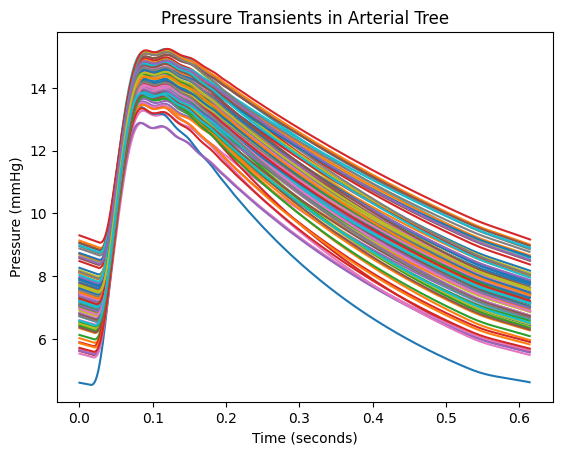

In [22]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
        # Adjust time and pressure trace for each realization
        t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
        p_pat = test[ind].loc[ind]['p_pat']  # Pressure transient

        # Plot the pressure transient for each realization
        ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

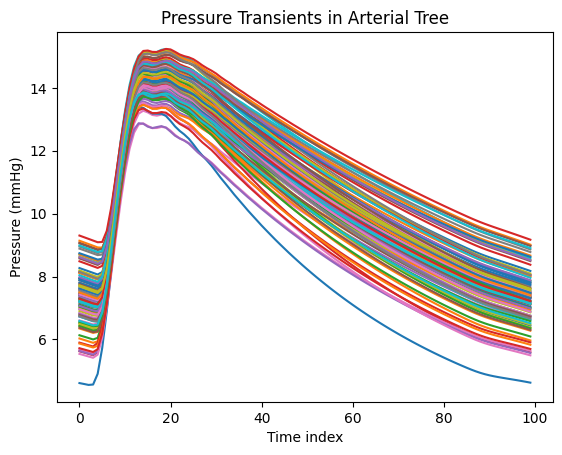

In [23]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
     T = T.values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)
    

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

     # Plot the interpolated pressure transient for each realization
     ax.plot(list(range(100)), p_pat_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Plot pressure in RV

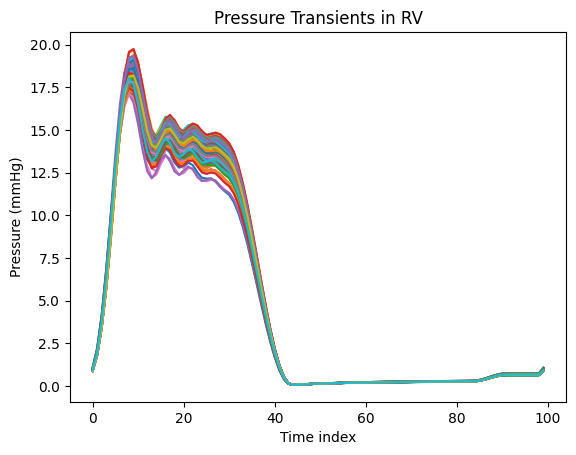

In [24]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
     p_rv_raw = test[ind].loc[ind]['p_rv'].values.copy()
     T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
     T = T.values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)
    

     # Interpolate pressure for 100 timesteps from 1000
     p_rv_resampled = np.interp(T_resample, T, p_rv_raw)

     # Plot the interpolated pressure transient for each realization
     ax.plot(list(range(100)), p_rv_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in RV')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Some of above traces are still nonsense
The code below will remove non feasible traces

In [25]:
## Create directory for pessure traces 
os.system(f'mkdir -p ../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_pat')
os.system(f'mkdir -p ../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_rv')

0

### Save feasible pressure traces, CO and dt, dPAP, sPAP, mPAP

In [26]:
# screen determines whetehr to screen for non-physiological pressure traces
screen = False

In [27]:
# Create column headers
headers = list(range(100)) + ['CO', 'dt', 'EF', 'dPAP', 'sPAP', 'mPAP'] 

# List to collect all pressure traces
pressure_traces_list_pat = []
pressure_traces_list_rv = []

for ind in range(len(test)):
    if not isinstance(test[ind], bool):
     
     # PAT pressure
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     
     # RV pressure 
     p_rv_raw = test[ind].loc[ind]['p_rv'].values.copy()

     T = test[ind].loc[ind]['T'].values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)
     p_rv_resampled = np.interp(T_resample, T, p_rv_raw)

     # Compute CO
     q_pat = test[ind].loc[ind]['q_pat'].values.copy()
     CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000.  # L / min

     # Compute EF
     v_rv = test[ind].loc[ind]['v_rv'].values.copy()
     EF = (np.max(v_rv) - np.min(v_rv)) / np.max(v_rv)

     # Compute dPAP, sPAP, mPAP
     dPAP = min(p_rv_raw)
     sPAP = max(p_rv_raw)
     mPAP = np.mean(p_rv_raw)
    
     # Record time interval, approx T (input param) / 100, there are some rounding differences due to interpolation
     tl = T_resample - test[ind].loc[ind]['T'].iloc[0]
     dt = np.diff(tl)[0]

     
     # Only create array if conditions hold or screening is turned off
     if not screen or (2 < CO < 12 and 4 < dPAP < 67 and 9 < mPAP < 87 and 15 < sPAP < 140):
     
     # Create a 2D array for saving
        pressure_trace_pat = np.hstack((p_pat_resampled, [CO], [dt], [EF], [dPAP], [sPAP], [mPAP]))
        pressure_trace_rv = np.hstack((p_rv_resampled, [CO], [dt], [EF], [dPAP], [sPAP], [mPAP]))
        pressure_traces_list_pat.append(pressure_trace_pat)
        pressure_traces_list_rv.append(pressure_trace_rv)
        
        # Save individual pressure trace to CSV with headers
        individual_df_pat = pd.DataFrame([pressure_trace_pat], columns=headers)
        individual_df_pat.to_csv(f'../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_pat/pressuretrace_{ind}.csv', index=False)
        individual_df_rv = pd.DataFrame([pressure_trace_rv], columns=headers)
        individual_df_rv.to_csv(f'../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_rv/pressuretrace_{ind}.csv', index=False)

# Convert the list of pressure traces to a DataFrame
pressure_traces_df_pat = pd.DataFrame(pressure_traces_list_pat, columns=headers)
pressure_traces_df_rv = pd.DataFrame(pressure_traces_list_rv, columns=headers)

# Save the DataFrame to a single CSV file with headers
pressure_traces_df_pat.to_csv(f'../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_pat/all_pressure_traces_pat.csv', index=False)
pressure_traces_df_rv.to_csv(f'../Results/Posterior_Simulations/posterior_sim_{sample_name}/pressure_traces_rv/all_pressure_traces_rv.csv', index=False)

### Plot successful traces

In [28]:
good_sims = pd.read_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_rv/all_pressure_traces.csv')
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(good_sims)): 
    t = range(100) # Time adjustment
    p_pat = good_sims.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pmzff/Documents/GitHub/ModularCirc/Emulation/Outputs/Output_100_5params/pressure_traces_rv/all_pressure_traces.csv'

### Need to add code here to resave input file with only successful simulations

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%